## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('df_LA_parcels_LAcity_cleaned_REV2_MB.pkl', compression = "gzip")

In [3]:
data = data.drop(['AIN','LandValue','ZIPcode5','ZIPcode4','geometry','Cluster'],axis=1)
data['Neighborhood'] = data['Neighborhood'].str.lower()
data

,SQFTmain,Bedrooms,Bathrooms,LandBaseYear,TotalValue,YearBuilt,EffectiveYearBuilt,PropertyUseCode,TaxRateArea,BusBenchClosestDist,SubwayStopClosestDist,Neighborhood,ShapeSTAre,ShapeSTLen
0,1650.0,4,2,2011,368094.0,1963,1963,0100,16,627.902037,81059.153781,canoga park,8115.922852,377.443437
1,1696.0,3,2,2013,741740.0,1959,1959,0100,16,2971.162781,29494.940324,encino,6754.044922,344.477163
3,1613.0,3,1,2009,237927.0,1907,1909,0100,7,2043.041637,7194.083587,south park,6750.490234,370.022185
4,2163.0,2,2,1975,175208.0,1960,1961,0100,67,6799.550634,16358.346982,hollywood hills west,7120.636719,349.173429
5,2494.0,2,2,2021,5700000.0,1965,1966,0101,67,6382.749033,14270.864947,hollywood hills west,11411.411133,451.598959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632859,2187.0,4,3,2018,830954.0,1955,1963,0100,14,1388.764601,37850.477861,san pedro,6029.481445,322.234960
632860,1305.0,3,2,2007,762000.0,1955,1955,0100,14,1882.772648,38133.074377,san pedro,8677.246094,402.365689
632861,1910.0,3,2,1975,124294.0,1961,1961,0100,308,648.733626,42062.411545,san pedro,6747.458984,334.916599
632868,4541.0,4,4,2013,1251407.0,2007,2007,0100,20,1809.655573,42164.699128,san pedro,6000.456055,320.017959


In [4]:
data2 = pd.read_pickle('neighborhoods_cluster.pkl')
data2['Neighborhood']=data2['Neighborhood'].str.lower()
data2 = data2.drop(['TotalValue'],axis =1 )

In [5]:
crime_data = pd.read_csv('neighbourhoods_crime_count_2010_to_2019.csv')
crime_data['name'] = crime_data['name'].str.lower()
crime_data.rename(columns = {'name':'Neighborhood'}, inplace = True)
crime_data = crime_data.drop(['Unnamed: 0','geometry'],axis =1 )

In [6]:
data = data.merge(right=data2,how = 'left' ,on='Neighborhood')
data = data.merge(right=crime_data,how = 'left' ,on='Neighborhood')
data

,SQFTmain,Bedrooms,Bathrooms,LandBaseYear,TotalValue,YearBuilt,EffectiveYearBuilt,PropertyUseCode,TaxRateArea,BusBenchClosestDist,SubwayStopClosestDist,Neighborhood,ShapeSTAre,ShapeSTLen,cluster,crime_count
0,1650.0,4,2,2011,368094.0,1963,1963,0100,16,627.902037,81059.153781,canoga park,8115.922852,377.443437,4,4405
1,1696.0,3,2,2013,741740.0,1959,1959,0100,16,2971.162781,29494.940324,encino,6754.044922,344.477163,3,5884
2,1613.0,3,1,2009,237927.0,1907,1909,0100,7,2043.041637,7194.083587,south park,6750.490234,370.022185,4,4823
3,2163.0,2,2,1975,175208.0,1960,1961,0100,67,6799.550634,16358.346982,hollywood hills west,7120.636719,349.173429,2,2981
4,2494.0,2,2,2021,5700000.0,1965,1966,0101,67,6382.749033,14270.864947,hollywood hills west,11411.411133,451.598959,2,2981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439938,2187.0,4,3,2018,830954.0,1955,1963,0100,14,1388.764601,37850.477861,san pedro,6029.481445,322.234960,4,8957
439939,1305.0,3,2,2007,762000.0,1955,1955,0100,14,1882.772648,38133.074377,san pedro,8677.246094,402.365689,4,8957
439940,1910.0,3,2,1975,124294.0,1961,1961,0100,308,648.733626,42062.411545,san pedro,6747.458984,334.916599,4,8957
439941,4541.0,4,4,2013,1251407.0,2007,2007,0100,20,1809.655573,42164.699128,san pedro,6000.456055,320.017959,4,8957


In [73]:
def costfilter(data,cost):
    data = data[(data['TotalValue']<=cost)]
    return data

In [74]:
data = costfilter(data,2500000)
data

,SQFTmain,Bedrooms,Bathrooms,LandBaseYear,TotalValue,YearBuilt,EffectiveYearBuilt,PropertyUseCode,TaxRateArea,BusBenchClosestDist,SubwayStopClosestDist,Neighborhood,ShapeSTAre,ShapeSTLen,cluster,crime_count
0,1650.0,4,2,2011,368094.0,1963,1963,0100,16,627.902037,81059.153781,canoga park,8115.922852,377.443437,4,4405
1,1696.0,3,2,2013,741740.0,1959,1959,0100,16,2971.162781,29494.940324,encino,6754.044922,344.477163,3,5884
2,1613.0,3,1,2009,237927.0,1907,1909,0100,7,2043.041637,7194.083587,south park,6750.490234,370.022185,4,4823
3,2163.0,2,2,1975,175208.0,1960,1961,0100,67,6799.550634,16358.346982,hollywood hills west,7120.636719,349.173429,2,2981
5,2486.0,4,3,1990,448452.0,1981,1981,0100,16,711.622834,77370.788696,west hills,7508.709961,357.622672,4,5010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439938,2187.0,4,3,2018,830954.0,1955,1963,0100,14,1388.764601,37850.477861,san pedro,6029.481445,322.234960,4,8957
439939,1305.0,3,2,2007,762000.0,1955,1955,0100,14,1882.772648,38133.074377,san pedro,8677.246094,402.365689,4,8957
439940,1910.0,3,2,1975,124294.0,1961,1961,0100,308,648.733626,42062.411545,san pedro,6747.458984,334.916599,4,8957
439941,4541.0,4,4,2013,1251407.0,2007,2007,0100,20,1809.655573,42164.699128,san pedro,6000.456055,320.017959,4,8957


In [75]:
def rank_rich_neighborhoods(data, metric=np.median):
    featuredata = data.copy() 
    featuredata['RankRich'] = 0
    neighborhoodrank = featuredata.groupby('Neighborhood')['TotalValue'].agg(np.mean).sort_values(ascending=False).to_frame()
    neighborhoodrank['Rank'] = np.arange(neighborhoodrank.shape[0])+1
    neighborhoodrank = neighborhoodrank.reset_index()
    for i in list(range(len(neighborhoodrank['Neighborhood']))):
        a = featuredata['Neighborhood'].str.lower().str.contains(neighborhoodrank['Neighborhood'][i].lower())
        featuredata.loc[a,['RankRich']] = featuredata.loc[a,['RankRich']]+neighborhoodrank['Rank'][i]   
    return featuredata

In [77]:
def HousetoParcel(data):
    featuredata = data.copy() 
    featuredata['HousetoParcel'] = featuredata['SQFTmain']/featuredata['ShapeSTAre']*100
    return featuredata

In [78]:
def Propertyusecategory(data):
    propertyusecodes = data['PropertyUseCode'].unique()
    category_type = pd.CategoricalDtype(categories=propertyusecodes)
    data.loc[:, 'PropertyUseCode'] = data.loc[:, 'PropertyUseCode'].astype(category_type)
    featuredata = pd.get_dummies(data, 
                          prefix='PropertyUseCode',
                          columns=['PropertyUseCode'], 
                          drop_first=True)
    return featuredata

In [136]:
taxratearea = data['TaxRateArea'].unique()
taxratearea

[16, 7, 67, 8852, 51, ..., 20, 308, 470, 484, 13811]
Length: 115
Categories (115, int64): [16, 7, 67, 8852, ..., 308, 470, 484, 13811]

In [141]:
def taxratearea(data):
    taxratearea = data['TaxRateArea'].unique()
    category_type = pd.CategoricalDtype(categories=taxratearea)
    data.loc[:, 'TaxRateArea'] = data.loc[:, 'TaxRateArea'].astype(category_type)
    featuredata = pd.get_dummies(data, 
                          prefix='TaxRateArea',
                          columns=['TaxRateArea'], 
                          drop_first=True)
    return featuredata

In [155]:
test = taxratearea(data)
taxratearealist = test.columns.str.contains('TaxRateArea')
taxratelistdata = test.loc[:,taxratearealist]
taxratelistdata

C:\Users\shado\AppData\Local\Temp\ipykernel_8304\2817508059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'TaxRateArea'] = data.loc[:, 'TaxRateArea'].astype(category_type)


,TaxRateArea_7,TaxRateArea_67,TaxRateArea_8852,TaxRateArea_51,TaxRateArea_13257,TaxRateArea_13261,TaxRateArea_13764,TaxRateArea_13767,TaxRateArea_408,TaxRateArea_13766,...,TaxRateArea_375,TaxRateArea_372,TaxRateArea_21,TaxRateArea_482,TaxRateArea_497,TaxRateArea_20,TaxRateArea_308,TaxRateArea_470,TaxRateArea_484,TaxRateArea_13811
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
439941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [156]:
def selectfeatures(data):
    data = data.copy()
    data = HousetoParcel(data)
    data = Propertyusecategory(data)
    data = rank_rich_neighborhoods(data, metric=np.median)   
    data = propertyage(data)
    data = taxratearea(data)
    taxratearealist = data.columns.str.contains('TaxRateArea')
    taxratelistdata = data.loc[:,taxratearealist]
    featuredata = data[['SQFTmain',
                               'Bedrooms',
                               'Bathrooms',
                               'BusBenchClosestDist',
                               'SubwayStopClosestDist',
                               'ShapeSTAre',
                               'TotalValue',
                               'ShapeSTLen',
                               'PropertyUseCode_0104',
                               'PropertyUseCode_0101',
                               'PropertyUseCode_0103',
                               'HousetoParcel',
                               'RankRich',
                               'cluster',
                               'EffectiveYearBuilt',
                               'crime_count']]
    featuredata = pd.concat([featuredata,  taxratelistdata], axis=1)
    return featuredata
    

In [157]:
featuredata = selectfeatures(data)
featuredata

,SQFTmain,Bedrooms,Bathrooms,BusBenchClosestDist,SubwayStopClosestDist,ShapeSTAre,TotalValue,ShapeSTLen,PropertyUseCode_0104,PropertyUseCode_0101,...,TaxRateArea_375,TaxRateArea_372,TaxRateArea_21,TaxRateArea_482,TaxRateArea_497,TaxRateArea_20,TaxRateArea_308,TaxRateArea_470,TaxRateArea_484,TaxRateArea_13811
0,1650.0,4,2,627.902037,81059.153781,8115.922852,368094.0,377.443437,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1696.0,3,2,2971.162781,29494.940324,6754.044922,741740.0,344.477163,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1613.0,3,1,2043.041637,7194.083587,6750.490234,237927.0,370.022185,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2163.0,2,2,6799.550634,16358.346982,7120.636719,175208.0,349.173429,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2486.0,4,3,711.622834,77370.788696,7508.709961,448452.0,357.622672,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439938,2187.0,4,3,1388.764601,37850.477861,6029.481445,830954.0,322.234960,0,0,...,0,0,0,0,0,0,0,0,0,0
439939,1305.0,3,2,1882.772648,38133.074377,8677.246094,762000.0,402.365689,0,0,...,0,0,0,0,0,0,0,0,0,0
439940,1910.0,3,2,648.733626,42062.411545,6747.458984,124294.0,334.916599,0,0,...,0,0,0,0,0,0,1,0,0,0
439941,4541.0,4,4,1809.655573,42164.699128,6000.456055,1251407.0,320.017959,0,0,...,0,0,0,0,0,1,0,0,0,0


In [158]:
from sklearn.model_selection import train_test_split


# Split dataset
train_cleaned, test_cleaned = train_test_split(featuredata, test_size=0.30, random_state=0)

# Print results
print('Train {}%'.format(train_cleaned.shape[0] / featuredata.shape[0] * 100))
print('Test {}%'.format(test_cleaned.shape[0] / featuredata.shape[0] * 100))

Train 69.99995297835123%
Test 30.00004702164877%


In [159]:
from sklearn.linear_model import LinearRegression

# Write your code here.
model = LinearRegression(fit_intercept=True)     # there is intercept in our model

In [160]:
def processdata(data):
    X = data.drop(['TotalValue'], axis = 1)
    y = data.loc[:, 'TotalValue']
    
    return X, y

In [161]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    
    # Write your code here.
    diff = actual-predicted                 #difference between actual and pedicted y
    numerator = sum(diff**2)                #creates the numerator
    denominator = predicted.shape[0]        #gets the legnth of the total dataset
    rmse = np.sqrt(numerator/denominator)   #gets rmse
    return rmse

In [162]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    
    # Setup
    model = clone(model)
    five_fold = KFold(n_splits=5)                    # specified 5 folds
    rmse_values = []
    
    # Iterature thought cv-folds
    for train_index, val_index in five_fold.split(X):
        
        # Write your code here.
        X_train_fold = X.iloc[train_index,:]         # gets k fold training x
        y_train_fold = y.iloc[train_index]           # gets k fold training y
        X_val_fold = X.iloc[val_index,:]             # gets k fold validation x
        y_val_fold = y.iloc[val_index]               # gets k fold validation y
        
        # Fit model
        model.fit(X_train_fold,y_train_fold)         # fit model based on k folded training data
        y_predicted = model.predict(X_val_fold)      # get predicted value from model based on validation x
        rmse_fold = rmse(y_val_fold,y_predicted)     # get rmse of each fold
        
        # Append RMSE scores
        rmse_values.append(rmse_fold)
        
    return rmse_values

In [163]:
X_train, y_train = processdata(train_cleaned)
X_train.head()

,SQFTmain,Bedrooms,Bathrooms,BusBenchClosestDist,SubwayStopClosestDist,ShapeSTAre,ShapeSTLen,PropertyUseCode_0104,PropertyUseCode_0101,PropertyUseCode_0103,...,TaxRateArea_375,TaxRateArea_372,TaxRateArea_21,TaxRateArea_482,TaxRateArea_497,TaxRateArea_20,TaxRateArea_308,TaxRateArea_470,TaxRateArea_484,TaxRateArea_13811
393885,950.0,2,1,868.772485,13817.947322,7324.665039,392.871964,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12283,1375.0,3,2,2663.779605,70413.480620,9757.439453,393.193389,0,1,0,...,0,0,0,0,0,0,0,0,0,0
370966,2574.0,4,1,1444.895589,6209.266759,6799.310547,371.990438,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29785,1761.0,3,2,837.512591,48214.979394,5999.800781,319.992682,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42180,1108.0,3,2,1543.998602,55637.613591,6224.403320,333.322536,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
cv_scores = cross_validate_rmse(model=LinearRegression(fit_intercept=True), X=X_train, y=y_train)
print('Cross-validation RMSE scores: {}'.format(cv_scores))
print('Cross-validation RMSE scores mean: ${}'.format(np.mean(cv_scores)))
print('Cross-validation RMSE scores std: ${}'.format(np.std(cv_scores)))

Cross-validation RMSE scores: [335856.37416218646, 337603.7479981112, 336850.1085333868, 334149.81047234853, 337468.42600390554]
Cross-validation RMSE scores mean: $336385.6934339877
Cross-validation RMSE scores std: $1276.792828405715


In [118]:
X_test, y_test = processdata(test_cleaned)
X_test.head()

,SQFTmain,Bedrooms,Bathrooms,BusBenchClosestDist,SubwayStopClosestDist,ShapeSTAre,ShapeSTLen,PropertyUseCode_0104,PropertyUseCode_0101,PropertyUseCode_0103,HousetoParcel,RankRich,cluster,EffectiveYearBuilt,crime_count
82474,2417.0,4,3,888.226418,24982.048112,6750.859375,370.042881,0,1,0,35.802849,24,4,2005,6178
50962,2456.0,4,3,3850.901758,55714.903433,17140.396484,538.343538,0,1,0,14.328723,26,4,1960,5020
65458,1260.0,3,2,1429.582924,38775.035384,6035.183594,321.862625,0,0,0,20.877575,69,4,1952,3287
393416,1326.0,3,2,4212.882968,8165.758788,5406.375000,350.320694,0,0,0,24.526601,114,4,1991,9212
58770,1181.0,3,2,543.505457,40854.599054,6824.783203,339.992612,0,0,0,17.304579,69,4,1950,3287


In [119]:
model.fit(X_train, y_train)

# Compute the fitted and predicted values of SalePrice
y_fitted = model.predict(X_train)

In [120]:
y_test_predicted = model.predict(X_test) 
y_test_predicted

array([ 954772.36399875,  726413.35054863,  336829.61961575, ...,
       1326371.49400888,  402467.40529456,  372888.54348052])

In [121]:
a = X_test.index

In [122]:
plot_data = data.loc[a,['TotalValue']]
plot_data['Test_pred'] = y_test_predicted 
plot_data = plot_data.reset_index().reset_index().sort_values('level_0')
plot_data

,level_0,index,TotalValue,Test_pred
0,0,82474,1065893.0,9.547724e+05
1,1,50962,196101.0,7.264134e+05
2,2,65458,565801.0,3.368296e+05
3,3,393416,145385.0,3.973701e+05
4,4,58770,64494.0,3.095425e+05
...,...,...,...,...
127596,127596,40767,506788.0,3.815265e+05
127597,127597,146319,235474.0,1.066373e+05
127598,127598,284551,582922.0,1.326371e+06
127599,127599,211412,537934.0,4.024674e+05


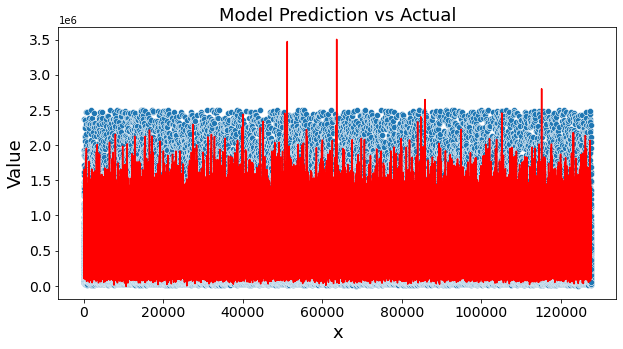

In [123]:
plt.figure(figsize=(10, 5))                                                        #figure size
plt.title('Model Prediction vs Actual', fontsize=18)          #figure title
ax = sns.lineplot(data=plot_data,x ='level_0',y='Test_pred',color='r')                 #desired dataframe and the x and y variables
ax = sns.scatterplot(data = plot_data,x='level_0', y = 'TotalValue') 
ax.xaxis.set_tick_params(labelsize=14)                                             #x tick size
ax.yaxis.set_tick_params(labelsize=14)                                             #y tick size
ax.set_xlabel('x', fontsize=18)                                            #x axis label
ax.set_ylabel('Value', fontsize=18)                                      #y axis label
plt.show()